In [12]:
# This file is part of pam.

# pam is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# pam is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.

# You should have received a copy of the GNU General Public License
# along with pam.  If not, see <https://www.gnu.org/licenses/>.

# Photon-flux Calibration at HIγS using the (simple version of the) Paddle System

This notebook introduces the paddle system and the energy-sensitive detectors at High-Intensity Gamma-Ray Source (HI$\gamma$S) [1] and shows how the detectors can be used to create a photon-flux calibration.

For the propagation of uncertainty, this notebook relies on the "Propagation of distributions using a Monte Carlo method" as described in the Guide to the Expression of Uncertainty in Measurement (GUM) [2].

# 1. Introduction & Definitions

The precision of cross-section measurements in photonuclear experiments is often limited by the knowledge of the flux of the incoming photon beam. A detailed discussion can be found in the most recent NRF review article by Zilges et al. [3]. It is challenging to find a detection system that 

 * does not interfere with the actual measurement
 * has a high resolution
 * has a well-known energy-dependent efficiency
 * can tolerate the large photon flux on the order of $10^8$-$10^9$ photons per second

At the HIγS facility, a system of beam detectors called "paddles" has been installed to facilitate relative and absolute photon-flux measurements. A similar system that was used in the past, but was primarily been designed for high-energy measurements, is described in an article by Pywell et al. [4]. The system of Pywell et al. is more complicated than the one described here, but the article gives a nice overview of the demands and the functionality of a plastic-scintillator-based flux-measurement system, and it shows a schematic drawing of the setup.

One advantage of using this system compared to available alternatives (see, e.g. Ref. [4], or the more recent Ref. [5]) is the simplicity of the formalism.
The most general quantity used here is the area ($A$)-, energy ($E$)-, and time ($t$)-differential number of photons (i.e. the energy-differential photon flux) at the target position in the upstream target room (UTR, w.l.o.g. it is assumed that the experiment takes place there), which will be denoted as 

$\frac{\mathrm{d} N_\gamma }{ \mathrm{d} A \mathrm{d} E \mathrm{d} t}$ 

in the text. If a differential is omitted, this means that the energy-differential flux has been integrated over this quantity. For example, an integration over the time would result in:

$\frac{\mathrm{d} N_\gamma }{ \mathrm{d} A \mathrm{d} E} = \int \frac{\mathrm{d} N_\gamma }{ \mathrm{d} A \mathrm{d} E \mathrm{d} t} \mathrm{d} t$.

The total number of photons $\mathcal{N}$ can be obtained from the integral:

$\mathcal{N} = \int \int \int \frac{\mathrm{d} N_\gamma }{ \mathrm{d} A \mathrm{d} E \mathrm{d} t} \mathrm{d} A \mathrm{d} E \mathrm{d} t$.

Using the definition of $\mathcal{N}$, define the probability distribution $n_\gamma$ as:

$\frac{\mathrm{d} n_\gamma }{ \mathrm{d} A \mathrm{d} E \mathrm{d} t} = \frac{1}{\mathcal{N}} \frac{\mathrm{d} N_\gamma }{ \mathrm{d} A \mathrm{d} E \mathrm{d} t}$

It has the property:

$\int \int \int \frac{\mathrm{d} n_\gamma }{ \mathrm{d} A \mathrm{d} E \mathrm{d} t} \mathrm{d} A \mathrm{d} E \mathrm{d} t = 1$.

## 1.1 Detectors

The following detectors have been in use for experiments of the 2020-2022 HIγS campaigns (sorted by their position along the beamline from upstream to downstream):

- Mirror Paddle (**MPAD**): a plastic scintillator that is located downstream of the east mirror of the HIγS facility where the high-energy photon beam leaves the 'laser resonator'. The MPAD is upstream of the beam attenuators, i.e. it always observes the full photon flux without attenuation or collimation. The MPAD is usually in the optical axis all the time.
- Single Paddle (**SPAD**): a plastic scintillator that is located about 1 m downstream of the beam collimator in the collimator room. The SPAD and all following detectors observe the attenuated and collimated photon flux. The SPAD is usually in the optical axis all the time.
- Zero-degree detector: a 120% high-purity germanium (HPGe) detector that is located downstream of the experimental setups in the UTR. It can be moved into the optical axis if needed. The zero-degree detector is ideal for measurements of the spectral distribution of the photon beam due to its high energy resolution, but it can also be used for flux measurement. An important limitation for flux measurements is the challenging measurement of its efficiency at high photon energies.
- Compton Paddle (**CPAD**): a plastic scintillator that is located right behind the zero-degree detector, but still in the UTR. It observes the radiation that is (predominantly Compton) scattered off a 5.65(1)-mm thick copper target. By scattering the photons before they hit the detector, the designers wanted to reduce the flux through the scintillator to reduce pileup. In addition, Compton scattering at a given angle compresses the spectrum of the incoming photon energies, which means that the CPAD would have to be optimized for a smaller energy range. For example, scattering of photons with energies of 1 MeV to 10 MeV at 45 degrees results in a scattered-photon energy range of 0.6 MeV to 1.5 MeV. The target for the Compton paddle is usually in the optical axis all the time.
- MOLLY: a sodium iodide (NaI) detector on the downstream side of the gamma vault. MOLLY is ideal for absolute flux measurements due to its high efficiency. It can be moved into the optical axis if needed.

In addition, a system of beam attenuators exists at HIγS, which consists of six copper blocks with well-known dimensions.
Via remote-controlled motors, any combination of the six copper block can be inserted into the optical axis, giving a large variety of attenuation factors.

## 1.2 Procedure

The paddle detectors can always be used for flux monitoring, i.e. ensuring the stability of the beam during a run at a given energy.
They are thin enough to remain on the optical axis all the time without causing a significant attenuation of the beam flux.
This implies that their efficiency $\epsilon$ (number of signals versus number of photons passing through the paddle) is low, typically on the order of $10^{-5}$.

If an absolute flux calibration is desired, users are advised to determine the efficiency of the paddles experimentally for each experiment.
This is necessary because the the efficiency depends on the exact position of the detectors and the radiation damage, both of which are subject to change.
To establish an absolute photon-flux calibration, the MOLLY detector can be used.
The advantage of MOLLY is its large efficiency, which can be assumed to be $\epsilon_\mathrm{MOLLY} \approx 100\%$ for the beam energies of interest. This means that every beam photon hitting the detector can be assumed to result in a single recorded signal.
To be able to make the latter assumption, signal pileup in MOLLY must be negligible.
At typical values of the photon flux for HIγS experiments, this means that the beam needs to be attenuated while MOLLY is in the optical axis.

For the attenuation of the beam, the system of copper attenuators with different thicknesses $\Delta z$ is used.
The combined energy-dependent attenuation due to the copper blocks is given by:

$\frac{\mathrm{d}\tilde{N}_\gamma}{\mathrm{d} E} \left[ \frac{\mathrm{d} N_\gamma}{\mathrm{d} E} \right]^{-1} = \exp \left[ - \mu_\mathrm{Cu} \rho_\mathrm{Cu} \left( \sum_i \Delta z_i \right) \right]$

Here, $\mathrm{d}\tilde{N}_\gamma / \mathrm{d} E$ denotes the photon flux after attenuation by the system, $\mu_\mathrm{Cu}$ is the energy-dependent x-ray mass attenuation coefficient as defined by Hubbell and Seltzer [6], and $\rho_\mathrm{Cu}$ is the density of copper. 
For simplicitz, the attenuation coefficient was assumed to be independent of the spatial position (homogenous attenuator, approximately collinear beam) and the time.
Therefore, the area- and time differentials were omitted here.

Typical attenuator sizes in a calibration run with the MOLLY detector are so large that the count rates of the SPAD and the CPAD will be close to their background rates.
Therefore, only the MPAD can be calibrated in such a measurement.
The relative count rates of the MPAD, SPAD, and CPAD can be calibrated in another calibration run without attenuation and with MOLLY in its "out" position. 
This information can be used to ensure that the transmission of the beam does not change during the actual runs.
For example, if the photon beam became slightly misaligned with the axis, this might not cause a large change of the MPAD rate, but on a 53-m distance to the SPAD, already a small divergence of the beam should have a significant impact on the paddle rates in the UTR.

# 2. Formalism

## 2.1 Assumptions

At the typical precision level of flux-calibration measurements, a few simplifying assumptions can be made:

 1. Parallelism of the beam. The photon beam in the experimental areas is assumed to originate from a point-like collision point $z=0$ and propagate through a collimator with a radius $r_\mathrm{coll}$ centered around $z=z_\mathrm{coll}$. The current distance of the collimator from the collision point is $z_\mathrm{coll} = 53~m$, and typical collimator radii are on the order of $r_\mathrm{coll} = 0.01~m$, which means that the divergence of the beam is on the order of $r_\mathrm{coll}/z_\mathrm{coll} \approx 10^{-4}$. The maximum path-length difference of two photons traveling through the large 8.00(1)-cm attenuator blocks is therefore orders of magnitude lower than the uncertainty of their thickness.
 2. No signal pileup. For MOLLY, this can be ensured by using enough attenuation in the calibration measurements. For the paddles, it is recommended to test this experimentally by using different attenuators and photon fluxes.
 3. No dead time for the paddle detectors. Reading them out by a dead-time free scaler module usually ensures this.
 4. No dead time in background measurements. This only applies for MOLLY and the zero-degree detector, since the paddle detectors are assumed to be dead-time free anyway.
 5. No attenuation of the beam along the beam line. Even for the lowest beam energy of HI$\gamma$S of $E_\mathrm{beam} = 2 MeV$ (the attenuation coefficient of air decreases monotonously over a wide energy range), the attenuation of the beam along a 70-m long flight path (this is about the distance collision point - MOLLY) in air would be on the order of 0.4% [6].
 6. No attenuation of the beam by the SPAD. Assuming the paddle is made of 2 mm of plastic (polyethylene, paddle + tape around it), it attenuates the beam by about 1 % at 2 MeV. The attenuation coefficient of polyethylene also decreases monotonously over the typical energy range (see also point 5).
 7. Background subtraction. The background count rate $\mathrm{d} N_\mathrm{D,BKG} / \mathrm{d} t$ of each detector $D$ is determined in a separate measurement.
 8. Exact attenuation coefficients. The uncertainty of the attenuation coefficiencts by Hubbell and Seltzer [6] is neglected, because the uncertainty of the thickness of all absorbing parts is assumed to be the dominant contribution.
 9. Energy-independent efficiencies. The efficiency $\epsilon_D$ of each detector is assumed to have only a weak dependence on the energy within the range given by the HIγS beam, i.e. the quantity:
 
$\int_0^\infty \frac{\mathrm{d} n_\gamma}{\mathrm{d}E} \epsilon_D \left( E \right) \mathrm{d}E = \epsilon_D$.

is usually not included in energy integrals.

## 2.2 Expressions for the Count Rates

In the following, expressions for the count rate $\mathrm{d} N_D / \mathrm{d} t$ of each detector $D$ are derived.

### 2.2.1 MPAD

The count rate of the most upstream detector, the MPAD, is not affected by the attenuators or any other instrumentation.
Therefore, it is always given by:

$\frac{\mathrm{d} N_\mathrm{MPAD}}{\mathrm{d} t} = \frac{\mathrm{d} N_\gamma}{\mathrm{d} t} \frac{A_\mathrm{MPAD}}{A_\mathrm{coll}} \epsilon_\mathrm{MPAD} + \frac{\mathrm{d} N_\mathrm{MPAD,BKG}}{\mathrm{d} t}$.

Here, $\epsilon_\mathrm{MPAD}$ denotes the energy-integrated efficiency of the MPAD for the given spectral distribution of the beam. The symbolic factor $A_\mathrm{MPAD} / A_\mathrm{coll}$, which will be treated as a single calibration parameter 

$\tilde{\epsilon}_\mathrm{MPAD} = \frac{A_\mathrm{MPAD}}{A_\mathrm{coll}} \epsilon_\mathrm{MPAD}$

together with the MPAD efficiency, denotes the ratio of the geometric cross section of the beam at the position of the MPAD and after the collimator. Since $A_\mathrm{MPAD} > A_\mathrm{coll}$, the MPAD is always hit by a higher flux than the other detectors.

### 2.2.2 SPAD

The count rate of the SPAD -and all following detectors- is affected by the attenuators and the collimator, and therefore given by:

$\frac{\mathrm{d} N_\mathrm{SPAD}}{\mathrm{d} t} = \int_0^\infty \frac{\mathrm{d} \tilde{N}_\gamma}{\mathrm{d}E \mathrm{d} t} \mathrm{d}E \epsilon_\mathrm{SPAD}  + \frac{\mathrm{d} N_\mathrm{SPAD,BKG}}{\mathrm{d} t}$.

Since the energy dependence of the attenuation coefficient is not negligible within the spectral width of the HIγS beam, this equation contains an integral over the energy.

### 2.2.3 CPAD

In general, the count rate of the CPAD includes a complicated integral over all possible scattering angles by which a photon hitting the target can end up in the scintillator, and all possible beam energies. It is assumed here that the geometrical corrections are energy independent. In this case, they can be taken into account by a correction factor $c_\mathrm{geo}$ that will be absorbed into the calibration parameter. To be consistent, however, the energy dependence of the solid-angle differential Compton-scattering cross section $\mathrm{d} \sigma_\mathrm{Compton} / \mathrm{d} \Omega$ needs to be taken into account explicitly, since it was also decided to take into account the energy dependence of the mass attenuation coefficient, which is dominated by Compton scattering at certain energies.

$\frac{\mathrm{d} N_\mathrm{CPAD}}{\mathrm{d} t} = \int_0^\infty \frac{\mathrm{d} \tilde{N}_\gamma}{\mathrm{d}E \mathrm{d} t} \frac{\mathrm{d} \sigma_\mathrm{Compton}}{\mathrm{d}\Omega} \exp \left[ -\mu_\mathrm{target} \rho_\mathrm{target} \Delta z_\mathrm{target} \right] \mathrm{d}E c_\mathrm{geo} \epsilon_\mathrm{CPAD}  + \frac{\mathrm{d} N_\mathrm{CPAD,BKG}}{\mathrm{d} t}$.

As mentioned above, all other geometrical effects are assumed to be taken into account by $c_\mathrm{geo}$. Please note that the Compton-scattering cross section is assumed to be integrated over the energies of the incoming photons. The energy of the outgoing photons is fixed by kinematics and the requirement that they be emitted into the solid angle of the CPAD.
The Compton paddle is also potentially the first detector to be affected by the attenuation in the target in the UTR. Therefore, a generic attenuation factor has been added. The geometry or the composition of the UTR target may be more complicated than the equation suggests. For example, if the beam cross section area at the target position is 20% larger than the cross section of a homogenous, cylindric target whose main axis is aligned with the optical axis, the attenuation factor would be:

$0.2+0.8 \exp \left(-\mu_\mathrm{target} \rho_\mathrm{target} \Delta z_\mathrm{target}\right)$

### 2.2.4 MOLLY

Apart from the attenuators and the UTR target, the count rate of MOLLY is significantly affected by the attenuation in the scattering target of the CPAD, which adds another exponential factor to the expression.

$\frac{\mathrm{d} N_\mathrm{MOLLY}}{\mathrm{d} t} = \left[ \int_0^\infty \frac{\mathrm{d} \tilde{N}_\gamma}{\mathrm{d} E \mathrm{d} t} \mathrm{exp} \left( - \mu_\mathrm{Cu} \rho_\mathrm{Cu} \Delta z_\mathrm{CPAD} -\mu_\mathrm{target} \rho_\mathrm{target} \Delta z_\mathrm{target} \right) \mathrm{d} E \epsilon_\mathrm{MOLLY} + \frac{\mathrm{d} N_\mathrm{MOLLY,BKG}}{\mathrm{d} t} \right] \left( 1-\frac{t_\mathrm{dead}}{t_\mathrm{real}} \right)$

Here, $\Delta z_\mathrm{CPAD}$ denotes the thickness of the CPAD target. Since the MOLLY detector signals are usually processed and most probably digitized, the expression above also allows for a dead time of the data acquisition system which is expressed as the ratio between the dead time $t_\mathrm{dead}$ and the real time $t_\mathrm{real}$.

## 2.3 Expressions for the Calibration

At present, the most accurate calibration of the paddle detectors can be achieved in a measurement in which the absolute value of the photon flux is obtained with MOLLY. In the following, the count-rate expressions above are used to derive the formalism that is used in the present code for the calibration of the flux detectors.

### 2.3.1 MPAD calibration

The count rate of MOLLY can be solved for the total number of photons:

$\mathcal{N} = \frac{\frac{\mathrm{d} N_\mathrm{MOLLY}}{\mathrm{d} t} \left( 1-\frac{t_\mathrm{dead}}{t_\mathrm{real}} \right)^{-1} - \frac{\mathrm{d} N_\mathrm{MOLLY,BKG}}{\mathrm{d}t}}{\int_0^\infty \frac{\tilde{n}_\gamma}{\mathrm{d} E \mathrm{d} t} \exp \left( - \mu_\mathrm{Cu} \rho_\mathrm{Cu} \Delta z_\mathrm{CPAD} -\mu_\mathrm{target} \rho_\mathrm{target} \Delta z_\mathrm{target} \right) \mathrm{d} E \epsilon_\mathrm{MOLLY}}$.

The count rate of the MPAD is solved for the the product of the efficiency and the cross-section area of the beam. Both of these quantities are unknown, since the spatial extent of the beam at the position of the MPAD is not measured. The result is:

$\tilde{\epsilon}_\mathrm{MPAD} = \frac{\frac{\mathrm{d} N_\mathrm{MPAD}}{\mathrm{d} t} - \frac{\mathrm{d} N_\mathrm{MPAD, BKG}}{\mathrm{d} t}}{\mathcal{N} \frac{\mathrm{d} n_\gamma}{\mathrm{d} t}}$.

Now, insert the total number of photons from the MOLLY measurement to obtain the final result:

$\tilde{\epsilon}_\mathrm{MPAD} = \frac{\frac{\mathrm{d} N_\mathrm{MPAD}}{\mathrm{d} t} - \frac{\mathrm{d} N_\mathrm{MPAD, BKG}}{\mathrm{d} t}}{\frac{\mathrm{d} N_\mathrm{MOLLY}}{\mathrm{d} t} \left( 1-\frac{t_\mathrm{dead}}{t_\mathrm{real}} \right)^{-1} - \frac{\mathrm{d} N_\mathrm{MOLLY,BKG}}{\mathrm{d}t}} \frac{\int_0^\infty \frac{\tilde{n}_\gamma}{\mathrm{d} E \mathrm{d} t} \exp \left(  - \mu_\mathrm{Cu} \rho_\mathrm{Cu} \Delta z_\mathrm{CPAD} -\mu_\mathrm{target} \rho_\mathrm{target} \Delta z_\mathrm{target} \right) \mathrm{d} E}{\frac{\mathrm{d} n_\gamma}{\mathrm{d} t}} \epsilon_\mathrm{MOLLY}$.

This quantity is the conversion factor between the MPAD count rate and the rate of photons passing through the experimental setup in the UTR (not necessarily all through the target).

In principle, all quantities on the right-hand side of the final equation can be measured with the available beam diagnostics \[(background) rates, dead time, beam energy distribution\], simulated with high precision (efficiency of MOLLY) or looked up in the literature (attenuation coefficients, densities).
This means that the $\tilde{\epsilon}_\mathrm{MPAD}$ can be inferred from a single measurement with a suitable attenuator setting for MOLLY. This will be called an "end-to-end" calibration and could be as complex as described in Ref. [7].

In practice, however, it is possible to avoid many systematic uncertainties by performing multiple measurements with different combinations of attenuators.
Assuming that a background measurement is also available, such a series of experiments yields a set of values

$\left\{ \Delta Z_n = \sum_{i \in A_n} \Delta z_i, \left(\frac{\mathrm{d} N_\mathrm{MPAD}}{\mathrm{d} t}\right)_n, \left(\frac{\mathrm{d} N_\mathrm{MPAD, BKG}}{\mathrm{d} t}\right)_n, \left(\frac{\mathrm{d} N_\mathrm{MOLLY}}{\mathrm{d} t}\right)_n, t_{\mathrm{dead}, n}, t_{\mathrm{read}, n}, \left(\frac{\mathrm{d} N_\mathrm{MOLLY, BKG}}{\mathrm{d} t}\right)_n \right\}$,

where $A_n$ is the set of attenuators that was used for the $n$-th run. 
According to the equation above, the ratio of the background- and dead-time corrected count rates of MOLLY and the MPAD can be assumed (see below) to depend on $\Delta Z$ like:

$\frac{\frac{\mathrm{d} N_\mathrm{MOLLY}}{\mathrm{d} t} \left( 1-\frac{t_\mathrm{dead}}{t_\mathrm{real}} \right)^{-1} - \frac{\mathrm{d} N_\mathrm{MOLLY,BKG}}{\mathrm{d}t}}{\frac{\mathrm{d} N_\mathrm{MPAD}}{\mathrm{d} t} - \frac{\mathrm{d} N_\mathrm{MPAD, BKG}}{\mathrm{d} t}} = \underbrace{\frac{\epsilon_\mathrm{MOLLY}}{\tilde{\epsilon}_\mathrm{MPAD}}}_{\text{offset}} \exp \left(- \underbrace{\langle \mu \rho \rangle_{n_\gamma}}_{\text{slope}} \Delta Z \right)$.

This is a straight line in a logarithmic plot with the offset

$\frac{\epsilon_\mathrm{MOLLY}}{\tilde{\epsilon}_\mathrm{MPAD}}$

and the slope

$\langle \mu \rho \rangle_{n_\gamma}$.

The slope is the total attenuation effect due to all elements on the optical axis, denoted as a mean value of the product of the attenuation coefficient and the density.
To obtain the expression with the two fit parameters from the general relations above, the approximation

$\int_0^\infty n_\gamma \exp \left[ -\mu \rho \Delta Z \right]\mathrm{d}E \approx \exp \left[ -\int_0^\infty n_\gamma \mu \rho \mathrm{d} E \Delta Z \right] = \exp \left[ -\langle \mu \rho \rangle_{n_\gamma} \Delta Z \right]$

was made.
Using the series expansion of the exponential function, it can be seen that this is equivalent to the statement

$\langle \left( \mu \rho \right)^n \rangle \approx \langle  \mu \rho \rangle^n ~~~ \forall ~~~ n \in \mathcal{N}$

which is not true in general, but often a good approximation for the smoothly energy-dependent attenuation coefficient and the comparably narrow beam-energy spectrum.
This will be called a "black-box" calibration in the following.

**TODO**: Calibration of the other paddle detectors

# 3. References


[1] H. R. Weller *et al.*, Prog. Part. Nucl. Phys. **62**, 257-303 (2009) (https://doi.org/10.1016/j.ppnp.2008.07.001)

[2] JCGM 101:2008, Evaluation of measurement data - Supplement 1 to the "Guide to the expression of uncertainty in measurement" - Propagation of distributions using a Monte Carlo method, First Edition (2008) (https://www.bipm.org/en/committees/jc/jcgm/publications)

[3] A. Zilges *et al.*, Prog. Part. Nucl. Phys. **122**, 103903 (2022) (https://doi.org/10.1016/j.ppnp.2021.103903)

[4] R. E. Pywell *et al.*, Nucl. Instrum. Meth. A **606**, 517-522 (2009) (https://doi.org/10.1016/j.nima.2009.04.014)

[5] G. V. Turturica *et al.*, Nucl. Instrum. Meth. A **921**, 27-32 (2019) (https://doi.org/10.1016/j.nima.2018.12.048). This publication describes the use of a standalone energy-resolved Compton-scattering beam monitor (note the difference to the CPAD introduced in this text, which requires a calibration), a photoactivation reaction, and the same paddle system that is described here. In contrast to the present work, Turturica et al. used the paddle system only for a relative calibration.

[6] J. H. Hubbell and S. M. Seltzer, Tables of X-Ray Mass Attenuation Coefficients and Mass Energy-Absorption Coefficients from 1 keV to 20 MeV for Elements Z = 1 to 92 and 48 Additional Substances of Dosimetric Interest, NISTIR 5632 (2004) (https://dx.doi.org/10.18434/T4D01F)

[7] C. Sun *et al.*, Nucl. Instrum. Meth. A **605**, 312-317 (2009) (https://doi.org/10.1016/j.nima.2009.03.237)

# 4. Data

For better overview, experimental data are collected in the self-explanatory `Run` and `Calibration` classes.
A calibration consists of a single multiple runs with different attenuator settings.

In [1]:
from calibration_data import Calibration, Run

As stated in the introduction, the propagation of uncertainty relies on the Monte-Carlo propagation of distributions described in Ref. [2].
The probability distributions for each quantity are assumed to be given in `scipy.stats` nomenclature.

In [2]:
n_random = 1000 # Define the number of random samples used in the Monte Carlo procedure.

## 4.1 Test Data

In [3]:
import numpy as np
from scipy.stats import poisson, truncnorm

These are real data from the flux calibration of an experiment on the isotope $^{73}$Ge.
The resulting calibration is not very precise due to systematic uncertainties (see comments in code below), but it illustrates the general procedure.
With an isolated data acquisition system that only reads out the paddle system, a much higher relative precision of a few percent for the flux can be reached, as stated in Ref. [4].

In [4]:
attenuator_thickness_uncertainty = 0.01 # Uncertainty for each individual copper attenuator in cm, estimated from values like "8.00 cm" given on the attenuators. The uncertainty was assumed to be in the last digit.

In [5]:
# Run 106
# Replayed this run only for the number of seconds shown below.
# Around the middle of this run, one of the CeBr detectors started to experience an unphysically 
# high rate, which caused an enormous dead time.
#
# By fitting the 1460-keV background line from 40K in the MOLLY spectra, it was found that the 
# background level was about a factor of 1.2 higher in runs 131-133 than in run 106.
# The cause might be the difference in the position of MOLLY: In the background run, it was behind 
# the lead wall, while in the beam runs, it was on the optical axis.
# Since the shape of the background spectrum looks the same in all runs, I used the count rate in 
# the 1460-keV line to scale the background counts.
#
# There also seems to have been a problem with the dead-time readout in general, because the data
# acquisition system was reading out an array of 40+ detector channels in addition to the paddle
# system. This can be seen from the discrepancies between the background count rates in runs
# 131-133.
# For scaling the MOLLY background rate, the average of all three runs is used.
MPAD_background_counts_73Ge = poisson(13297)
background_time_73Ge = truncnorm(0., np.inf, loc=1119., scale=0.5)
K40_run_106 = truncnorm(0., np.inf, loc=6.81e4, scale=0.04e4)
K40_run_131 = truncnorm(0., np.inf, loc=1.929e4, scale=0.020e4)
K40_run_132 = truncnorm(0., np.inf, loc=8.65e3, scale=0.13e3)
K40_run_133 = truncnorm(0., np.inf, loc=9.42e3, scale=0.14e3)
time_131 = truncnorm(0., np.inf, loc=262, scale=0.5)
time_132 = truncnorm(0., np.inf, loc=120, scale=0.5)
time_133 = truncnorm(0., np.inf, loc=119, scale=0.5)
background_scaling_factor_random = (
    (
        K40_run_131.rvs(size=n_random)
        +K40_run_132.rvs(size=n_random)
        +K40_run_133.rvs(size=n_random)
    )*background_time_73Ge.rvs(size=n_random)
    /(
        (
            time_131.rvs(size=n_random)
            +time_132.rvs(size=n_random)
            +time_133.rvs(size=n_random)
        )
        *K40_run_106.rvs(size=n_random)
    )
)
background_scaling_factor_mean = np.mean(background_scaling_factor_random)
background_scaling_factor_std = np.std(background_scaling_factor_random)
MOLLY_background_counts_73Ge = truncnorm(
    0., np.inf, loc=1134961*background_scaling_factor_mean, 
    scale=np.sqrt(1134961*background_scaling_factor_mean**2+1134961**2*background_scaling_factor_std)
)

In [6]:
cal_73Ge_5020_keV = Calibration(
    identifier="MPAD_73Ge_5.02_MeV", 
    runs = [
        Run(
            identifier="131",
            attenuator_dz=truncnorm(0., np.inf, 2.45+4.90+8.00+8.00+8.00+8.00, np.sqrt(6.)*attenuator_thickness_uncertainty),
            MPAD_counts=poisson(98398),
            time=time_131,
            MPAD_background_counts=MPAD_background_counts_73Ge,
            background_time=background_time_73Ge,
            MOLLY_counts = poisson(583719),
            MOLLY_efficiency=1.,
            MOLLY_dead_time=0.0045,
            MOLLY_background_counts=MOLLY_background_counts_73Ge,
            
        ),
        Run(
            identifier="132",
            attenuator_dz=truncnorm(0., np.inf, 4.90+8.00+8.00+8.00+8.00, np.sqrt(5.)*attenuator_thickness_uncertainty),
            MPAD_counts=poisson(44940),
            time=time_132,
            MPAD_background_counts=MPAD_background_counts_73Ge,
            background_time=background_time_73Ge,
            MOLLY_counts = poisson(386748),
            MOLLY_efficiency=1.,
            MOLLY_dead_time=0.0061,
            MOLLY_background_counts=MOLLY_background_counts_73Ge,
            
        ),
        Run(
            identifier="133",
            attenuator_dz=truncnorm(0., np.inf, 2.45+8.00+8.00+8.00+8.00, np.sqrt(5.)*attenuator_thickness_uncertainty),
            MPAD_counts=poisson(44420),
            time=time_133,
            MPAD_background_counts=MPAD_background_counts_73Ge,
            background_time=background_time_73Ge,
            MOLLY_counts = poisson(628966),
            MOLLY_efficiency=1.,
            MOLLY_dead_time=0.0097,
            MOLLY_background_counts=MOLLY_background_counts_73Ge,
            
        ),
    ]
)

In [7]:
calibrations = [
    cal_73Ge_5020_keV
]

By varying the input parameters within their probability distributions, sample the uncertainty of the MPAD efficiency.

In [8]:
from scipy.optimize import curve_fit

In [9]:
class BlackBoxCalibration:
    """Class for Monte Carlo sampling and Fitting experimental calibration-run data
    
    The class uses scipy.optimize.curve_fit for fitting, which is a least-squares algorithm.
    Least squares is exact of the probability distributions of the data points are approximately 
    normal distributions.
    If the statistics in the measurement were good enough (as they should be in a calibration)
    measurement, then this approximation is well justified.
    
    Attributes
    ----------
    runs: list of Run objects
        Run data for a single calibration run (same beam conditions, but different attenuators) 
        with the MPAD and MOLLY.
    """
    def __init__(self, runs):
        """Initialization
        
    Parameters
    ----------
    runs: list of Run objects
        Run data for a single calibration run (same beam conditions, but different attenuators) 
        with the MPAD and MOLLY.
        
        """
        self.runs = runs
        
    def eval_dist(self, number_or_dist, random=False):
        """Either evaluates the mean or sample a random value from a given distribution

    This function was implemented for quick switching between the deterministic and random mode 
    of evaluation.
    Instead of a scipy.stats.rv_continuous distribution, the function can also accept a single 
    float and simply return it, i.e. it would act like a delta distribution.

    Parameters
    ----------
    number_or_dist: float or scipy.stats.rv_continuous
        Float to pass through or distribution to evaluate.
    random: bool
        If number_or_dist is a scipy.stats.rv_continuous object, True will return 
        scipy.stats.rv_continuous.rvs() and False will return scipy.stats.rv_continuous.mean(). 
        Default: False.

    Returns
    -------
    float
        Mean value of the distribution, or a random number sampled from it.
        """
        if isinstance(number_or_dist, (int, float)):
            return number_or_dist
        return number_or_dist.rvs() if random else number_or_dist.mean()

    def MOLLY_MPAD_normalization(self, run, random=False):
        """Calculate the background-corrected MOLLY rate using the MPAD for normalization

    Parameters
    ----------
    run: Run
        Run information
    random: bool
        Determines whether the mean values of all parameters should be used (False) or random 
        values should be sampled from their respective probability distributions (True).

    Returns
    -------
    float
        Ratio of the background-rate-corrected MOLLY rate and the background-rate-corrected MPAD rate.    
        """

        return (
            (
                self.eval_dist(run.MOLLY_counts, random)/(
                    self.eval_dist(run.time, random)*(1.-self.eval_dist(run.MOLLY_dead_time, random))
                )
                -self.eval_dist(run.MOLLY_background_counts, random)/self.eval_dist(run.background_time, random)
            )
            /(
                self.eval_dist(run.MOLLY_efficiency, random)
                *(
                    self.eval_dist(run.MPAD_counts, random)/self.eval_dist(run.time, random)
                    -self.eval_dist(run.MPAD_background_counts, random)/self.eval_dist(run.background_time, random)
                )
            )
        )
    
    def ln_MOLLY_rate_over_MPAD_rate(self, dZ, ln_MOLLY_efficiency_over_MPAD_efficiency, mean_attenuation_coefficient_times_density):
        """Model for the attenuation dependence of the MOLLY/MPAD rate ratio
        
    The fit uses the logarithm of the model to turn the fit into a simple linear regression.
    
    Paramters
    ---------
    dZ: float
        Attenuator thickness in arbitrary length unit.
    ln_MOLLY_efficiency_over_MPAD_efficiency: float
        Logarithm of the ratio of the efficiencies of MOLLY and the MPAD.
    mean_attenuation_coefficient_times_density: float
        Product of the attenuation coefficient times the density of the attenuators.
        The unit of the product must be the inverse of the length unit used for dZ.
        
    Returns
    -------
    float
        Ratio of the count rates of MOLLY and the MPAD for the given parameters.
        """
        return ln_MOLLY_efficiency_over_MPAD_efficiency+mean_attenuation_coefficient_times_density*dZ

    def fit(self, n_random=100):
        """Fit the model for the attenuation dependence of the MOLLY/MPAD rate ratio
        
    The result of the fit will constrain the efficiency of the MPAD and the product of the
    averaged attenuation coefficient and the density of the attenuators.
    The least-squares fit is performed n_random times using curve_fit without weights.
    If the relative uncertainties of the calibration data were significantly different, a weighted
    fit should be used.
    
    Parameters
    ----------
    n_random: int
        Number of random samples to be drawn in the Monte Carlo propagation of uncertainties.
    
    Returns
    -------
    dZ: (len(self.runs), n_random) ndarray
        Monte Carlo samples for the attenuator thickness in the given units.
    molly_vs_mpad: (len(self.runs), n_random) ndarray
        Samples for the MOLLY/MPAD rate ratio.
    popt: (n_random, 2) ndarray
        List of fit parameters for each set of random samples.
        The first column contains offsets, while the second column contains the slope..
        """
        molly_vs_mpad = np.array(
            [
                [self.MOLLY_MPAD_normalization(run, random=True) for n in range(n_random)]
                for run in self.runs
            ]
        )

        dZ = np.array(
            [
                run.attenuator_dz.rvs(size=n_random) for run in self.runs
            ]
        )

        popt = np.array([
            curve_fit(self.ln_MOLLY_rate_over_MPAD_rate,
                      dZ[:,n], np.log(molly_vs_mpad[:,n]),
                     )[0] for n in range(n_random)
        ])
        
        return (dZ, molly_vs_mpad, popt)

In [10]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from uncertainties import ufloat # For displaying the fit results in a nice form

Processing calibration data 'MPAD_73Ge_5.02_MeV' ...
Finished processing calibration 'MPAD_73Ge_5.02_MeV'. Exported plot to 'MPAD_73Ge_5.02_MeV.pdf'.


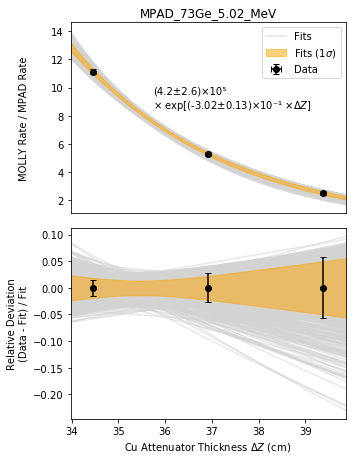

In [11]:
n_random = 1000

for calibration in calibrations:
    print("Processing calibration data '{}' ...".format(calibration.identifier))
    model = BlackBoxCalibration(calibration.runs)
    dz, molly_vs_mpad, popt = model.fit(n_random=n_random)

    dz_plot = np.linspace(
        calibration.runs[0].attenuator_dz.mean()-0.1*(calibration.runs[-1].attenuator_dz.mean()-calibration.runs[0].attenuator_dz.mean()),
        calibration.runs[-1].attenuator_dz.mean()+0.1*(calibration.runs[-1].attenuator_dz.mean()-calibration.runs[0].attenuator_dz.mean()),
        100
    )
    fit = [np.exp(model.ln_MOLLY_rate_over_MPAD_rate(dz_plot, *popt[n])) for n in range(n_random)]
    fit_mean = np.mean(fit, axis=0)
    inverse_fit_mean = 1./fit_mean
    fit_mean_inter = interp1d(dz_plot, fit_mean)
    fit_std = np.std(fit, axis=0)
    fit_std_inter = interp1d(dz_plot, fit_std)

    dz_mean = np.mean(dz, axis=1)
    fit_mean_inter_plot = fit_mean_inter(dz_mean)
    inverse_fit_mean_inter = 1./fit_mean_inter_plot
    dz_std = np.std(dz, axis=1)
    molly_vs_mpad_mean = np.mean(molly_vs_mpad, axis=1)
    molly_vs_mpad_std = np.std(molly_vs_mpad, axis=1)
    exp_intercept = np.exp(popt[:,0])
    ngamma_vs_mpad = ufloat(np.mean(exp_intercept), np.std(exp_intercept))
    attenuation_coefficient_times_density = ufloat(np.mean(popt[:,1]), np.std(popt[:,1]))

    fig, ax = plt.subplots(2,1, figsize=(5, 6.5))
    plt.subplots_adjust(hspace=0)
    ax[0].set_title(calibration.identifier)
    ax[0].set_ylabel("MOLLY Rate / MPAD Rate")
    ax[0].set_xlim(dz_plot[0], dz_plot[-1])
    ax[0].set_xticks([])
    ax[0].errorbar(dz_mean, molly_vs_mpad_mean, xerr=dz_std, yerr=molly_vs_mpad_std,
                fmt="o", capsize=3, color="black", label="Data")
    for n in range(n_random):
        ax[0].plot(
            dz_plot, fit[n],
            color="lightgrey", alpha=0.5, label=None if n > 0 else "Fits", zorder=0
        )
    ax[0].fill_between(dz_plot, -fit_std+fit_mean, fit_std+fit_mean, color="orange", alpha=0.5, zorder=1, label="Fits (1$\sigma$)")
    ax[0].text(
        0.3, 0.6,
        "{:eP}".format(ngamma_vs_mpad)
        +"\n"+r"$\times$ exp[{:eP} $\times \Delta Z$]".format(attenuation_coefficient_times_density),
        horizontalalignment="left", verticalalignment="center", transform=ax[0].transAxes
    )
    ax[0].legend()

    ax[1].set_xlabel("Cu Attenuator Thickness $\Delta Z$ (cm)")
    ax[1].set_ylabel("Relative Deviation\n(Data - Fit) / Fit")
    ax[1].set_xlim(dz_plot[0], dz_plot[-1])
    for n in range(n_random):
        ax[1].plot(
            dz_plot, (fit[n]-fit_mean)/fit_mean,
            color="lightgrey", alpha=0.5,
            zorder=0
        )
    ax[1].fill_between(dz_plot, -fit_std*inverse_fit_mean, fit_std*inverse_fit_mean, color="orange", alpha=0.5)
    ax[1].errorbar(dz_mean, (molly_vs_mpad_mean-fit_mean_inter(dz_mean))*inverse_fit_mean_inter,
                   xerr=dz_std,
                   yerr=molly_vs_mpad_std*inverse_fit_mean_inter,
                   fmt="o", color="black", zorder=1, capsize=3)
    fig.align_ylabels()
    plt.tight_layout()
    output_file_name = "{}.pdf".format(calibration.identifier)
    plt.savefig(output_file_name)
    
    print("Finished processing calibration '{}'. Exported plot to '{}'.".format(calibration.identifier, output_file_name))